In [2]:
%matplotlib inline

In [3]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import json

In [4]:
def load_dataset(name):
    with open(name) as fp:
        a = np.loadtxt(fp)
    return a

def get_sigma():
    with open("mod_labels.dat") as fp:
        contents = list(fp)
        return float(contents[0].strip())

def get_labels():
    with open("mod_labels.dat") as fp:
        contents = list(fp)
        items = map(lambda x: x.strip().split(), contents[1:])
        return map(lambda (x,y): (int(x),y), items)

In [5]:
siminfo = json.load(open("simulationinfo.json"))
router = int(siminfo["router"])
bridge1 = int(siminfo["n_bridge"])
bridge2 = int(siminfo["m_bridge"])

In [6]:
router_i1 = load_dataset("queue-N{}-D0-TxQueue.dat".format(router))
router_i2 = load_dataset("queue-N{}-D1-TxQueue.dat".format(router))
bridge1_i = load_dataset("queue-N{}-D0-TxQueue.dat".format(bridge1))
bridge2_i = load_dataset("queue-N{}-D0-TxQueue.dat".format(bridge2))

In [7]:
np.max(router_i1[:,1])

35.0

In [8]:
np.max(router_i2[:,1])

42.0

In [9]:
np.max(bridge1_i[:,1])

44.0

In [10]:
np.max(bridge2_i[:,1])

42.0

In [11]:
router_i1[:,0]

array([ 0.991031,  0.991031,  0.991076, ...,  6.32406 ,  6.32904 ,  6.32904 ])

In [12]:
def biggest_in_range(a, x, spread):
    m = []
    for v in a:
        if x-spread <= v[0] <= x+spread:
            m.append(v[1])
    try:
        return max(m)
    except ValueError:
        return 5
bir = biggest_in_range

In [13]:
def plot_queue(data):
    plt.plot(data[:,0], data[:,1])
    labels = get_labels()
    for x, anno in labels:
        x /= 1000.0
        s = (get_sigma() / 1000.0) * 100
        plt.annotate(anno, xy=(x,bir(data, x, s)))
    return plt

<module 'matplotlib.pyplot' from '/usr/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

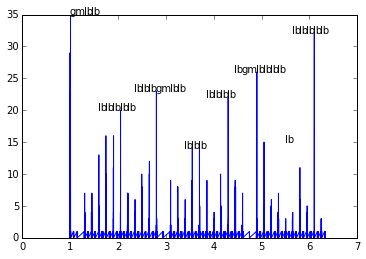

In [14]:
plot_queue(router_i1)

<module 'matplotlib.pyplot' from '/usr/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

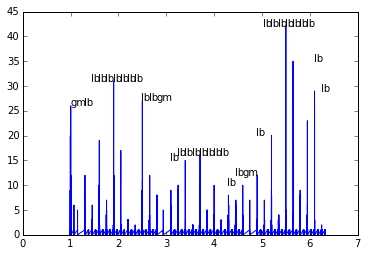

In [15]:
plot_queue(router_i2)

<module 'matplotlib.pyplot' from '/usr/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

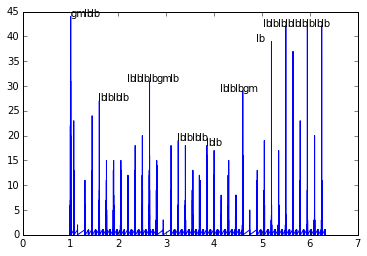

In [16]:
plot_queue(bridge1_i)

<module 'matplotlib.pyplot' from '/usr/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

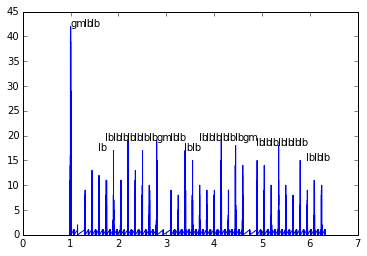

In [17]:
plot_queue(bridge2_i)

In [18]:
def plot_many(data):
    x = data[:,0]
    ys = [data[:,i] for i in range(1,len(data[0]))]
    args = []
    for y in ys:
        args.append(x)
        args.append(y)
    plt.plot(*args)
    return plt

<module 'matplotlib.pyplot' from '/usr/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

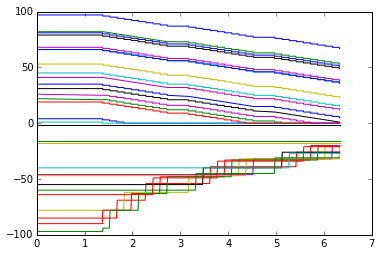

In [19]:
m = load_dataset("migrations.dat")
plot_many(m)


In [22]:
sum(m[-1][1:])

118.0

In [23]:
sum(m[0][1:])

118.0

In [25]:
sum(np.abs(m[-1][1:]-m[0][1:]))/2

430.0

In [23]:
m = load_dataset("losses.dat")
plot_many(m)

/usr/lib/python2.7/site-packages/numpy/lib/npyio.py:823: UserWarning: loadtxt: Empty input file: "<open file 'losses.dat', mode 'r' at 0x7f7f79989780>"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


IndexError: too many indices for array

<module 'matplotlib.pyplot' from '/usr/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

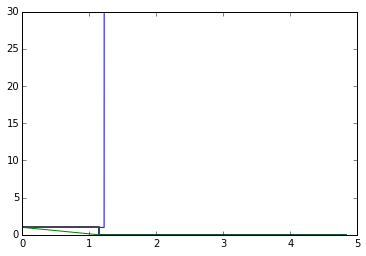

In [24]:
m = load_dataset("groupsizes.dat")
plot_many(m)